In [4]:
import random
import numpy as np

shape = (42,42)
WALL = 0
FLOOR = 1
fill_prob = 0.4

def display_cave(matrix):
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            char = "#" if matrix[i][j] == WALL else "."
            print(char, end='')
        print()


new_map = np.ones(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        choice = random.uniform(0, 1)
        new_map[i][j] = WALL if choice < fill_prob else FLOOR

# run for 6 generations
generations = 6
for generation in range(generations):
    for i in range(shape[0]):
        for j in range(shape[1]):
            # get the number of walls 1 away from each index
            # get the number of walls 2 away from each index
            submap = new_map[max(i-1, 0):min(i+2, new_map.shape[0]),max(j-1, 0):min(j+2, new_map.shape[1])]
            wallcount_1away = len(np.where(submap.flatten() == WALL)[0])
            submap = new_map[max(i-2, 0):min(i+3, new_map.shape[0]),max(j-2, 0):min(j+3, new_map.shape[1])]
            wallcount_2away = len(np.where(submap.flatten() == WALL)[0])
            # this consolidates walls
            # for first five generations build a scaffolding of walls
            if generation < 5:
                # if looking 1 away in all directions you see 5 or more walls
                # consolidate this point into a wall, if that doesnt happpen
                # and if looking 2 away in all directions you see less than
                # 7 walls, add a wall, this consolidates and adds walls
                if wallcount_1away >= 5 or wallcount_2away <= 7:
                    new_map[i][j] = WALL
                else:
                    new_map[i][j] = FLOOR
            # this consolidates open space, fills in standalone walls,
            # after generation 5 consolidate walls and increase walking space
            # if there are more than 5 walls nearby make that point a wall,
            # otherwise add a floor
            else:
                # if looking 1 away in all direction you see 5 walls
                # consolidate this point into a wall,
                if wallcount_1away >= 5:
                    new_map[i][j] = WALL
                else:
                    new_map[i][j] = FLOOR

display_cave(new_map)

..........#....#......####..##....#######.
..........##........##########....########
...................###########....########
...................###########.....#######
...................############.....#####.
....................###########......####.
................##.....#######............
........................#####.............
.........................####......###....
..##......................###.......##....
.####.....................##..............
.####.....................................
.####...####....#.....##............#.....
.####....###...###........................
.####.....#....####.......................
.####..........######.....................
.###............#####.......##............
.........####..............####...........
........######.............####...........
........#######........##..#####..........
.........#########..........#####.........
.........##########..........#####........
.........###########.........#####........
..........#

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

def initialize_grid(size, fill_probability):
    """Initialize a grid with random 0s and 1s based on fill probability."""
    return np.random.choice([0, 1], size=size, p=[1-fill_probability, fill_probability])

def display_grid(grid):
    """Visualize the grid using matplotlib."""
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='binary')
    plt.axis('off')
    plt.show()


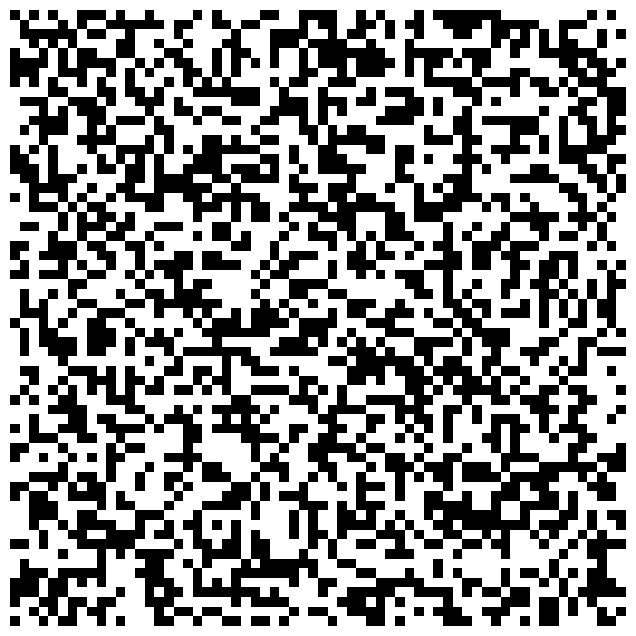

In [6]:
size = (64, 64)  # Grid size
fill_probability = 0.45  # Probability of a cell being a wall (1)

# Initialize and display the grid
grid = initialize_grid(size, fill_probability)
display_grid(grid)


In [7]:
def apply_ca_rules(grid, birth_limit, survival_limit):
    """Apply cellular automata rules to the grid."""
    new_grid = grid.copy()
    rows, cols = grid.shape
    
    for x in range(rows):
        for y in range(cols):
            # Count the number of walls in the 8-neighborhood
            neighbors = grid[max(0, x-1):min(rows, x+2), max(0, y-1):min(cols, y+2)].sum() - grid[x, y]
            
            if grid[x, y] == 1:
                # Survival rule
                new_grid[x, y] = 1 if neighbors >= survival_limit else 0
            else:
                # Birth rule
                new_grid[x, y] = 1 if neighbors >= birth_limit else 0
    
    return new_grid


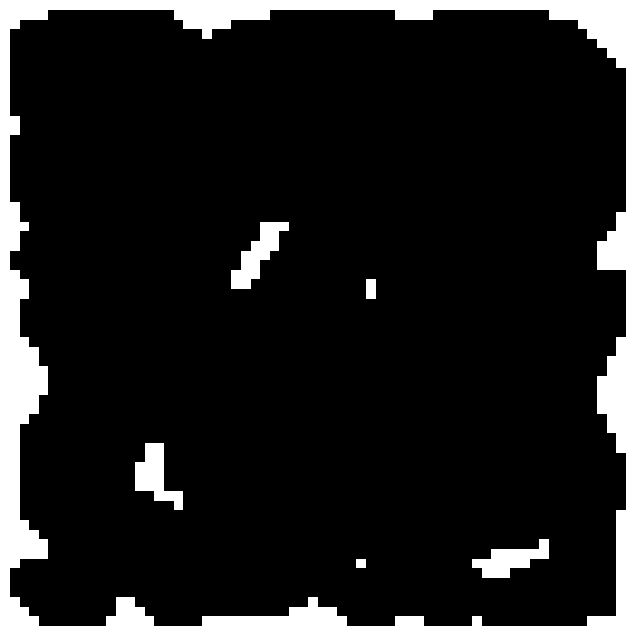

In [8]:
birth_limit = 4  # Minimum neighbors to create a wall
survival_limit = 3  # Minimum neighbors to keep a wall

# Apply CA rules over multiple iterations
iterations = 5
for _ in range(iterations):
    grid = apply_ca_rules(grid, birth_limit, survival_limit)

display_grid(grid)


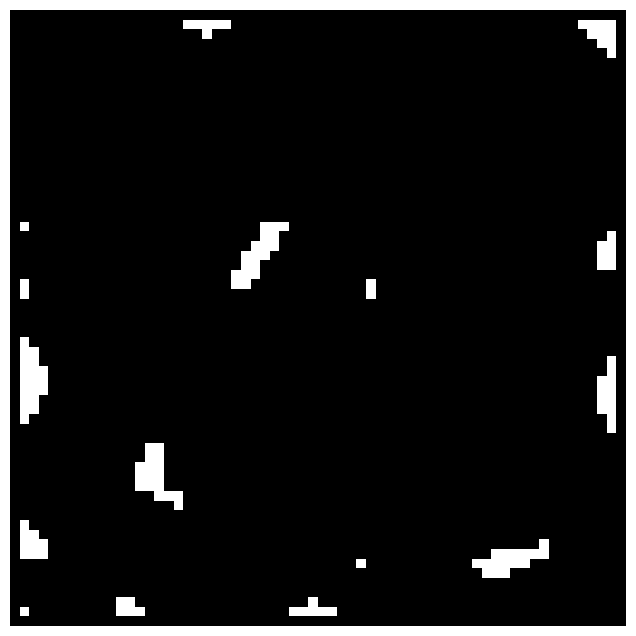

In [9]:
def add_boundaries(grid):
    """Add solid boundaries around the grid."""
    grid[0, :] = 1
    grid[-1, :] = 1
    grid[:, 0] = 1
    grid[:, -1] = 1
    return grid

# Add boundaries to the cave
grid = add_boundaries(grid)
display_grid(grid)


In [10]:
def save_to_file(grid, filename):
    """Save the grid to a text file."""
    np.savetxt(filename, grid, fmt='%d')

# Save the cave grid to a file
save_to_file(grid, "cave_map.txt")
print("Cave map saved to cave_map.txt")


Cave map saved to cave_map.txt
